#                                   Case Study on Regression

#### The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making. Find the best linear relationship between year and price. Can you predict the possible price of a 2022 model second-hand grand i10? Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset

data = pd.read_csv(r"C:\Users\sravi\Downloads\ICTAK\supervised learning\car_age_price.csv")
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [3]:
# Basic information about data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [4]:
# Statistical information about data

data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [5]:
# To find data have any null values

data.isna().sum()

Year     0
Price    0
dtype: int64

#### There is no null values in the data.

<Axes: >

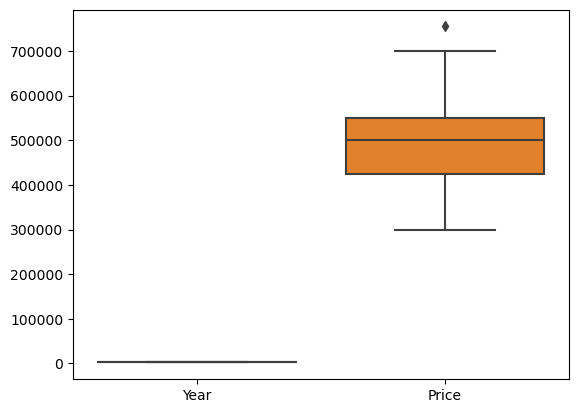

In [6]:
# Checking is there any outlier in the data

sns.boxplot(data[['Year','Price']])

#### Outlier is very less in this data.

<Axes: >

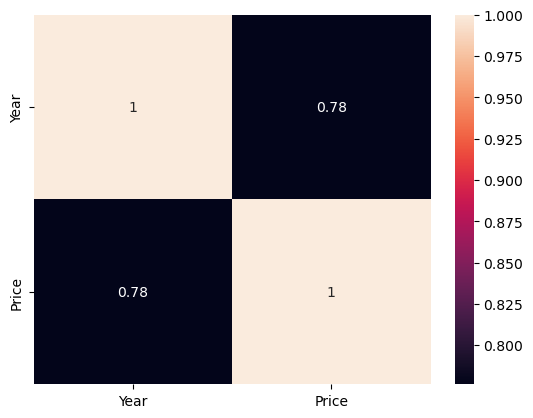

In [7]:
# To find Correlation

sns.heatmap(data.corr(),annot=True)

#### Here there is only two variables. So we can't drop.

In [8]:
# Let train and test the data.

y = data['Price']
X = data.drop(['Price'],axis=True)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42, test_size=.25)

## Linear Regression Model

In [9]:
# To find the best linear relationship between year and price. 

from sklearn import linear_model
lin_model = linear_model.LinearRegression()
model = lin_model.fit(X_train,y_train)
lin_predict = model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
print('Mean Squared Error is :',mean_squared_error(y_test,lin_predict))
print('R Squared error is :',r2_score(y_test,lin_predict))

Mean Squared Error is : 3878767151.073449
R Squared error is : 0.4347961632108023


## Lasso Regression Model

In [10]:
# Lasso is a modification of linear regression, where the model is penalized for the sum of absolute values of the weights.

from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
las_model = lasso.fit(X_train,y_train)
las_predict = las_model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
print('Mean Squared Error is :',mean_squared_error(y_test,las_predict))
print('R Squared error is :',r2_score(y_test,las_predict))

Mean Squared Error is : 3878764025.5442586
R Squared error is : 0.43479661865476726


### By comparing both model. We can see that Lasso Regression Model is slightly better.
* In the context of Mean Squared Error (MSE), a lower value indicates better performance. So, in our case, the model with an MSE of 3878764025.5442586 is better than the one with an MSE of 3878767151.073449.
* In coefficient of determination (R-squared), a higher value indicates better performance. So, in our case, the model with an R-squared value of 0.43479661865476726 is better than the one with an R-squared value of 0.4347961632108023.
* Therefore,  Lasso regression model performs slightly better in terms of minimizing prediction errors and explaining the variance in the test data.

## Predict price for 2022 model using both models

In [11]:
year_2022 = np.array([[2022]])

linear_price_2022 = model.predict(year_2022)[0]
lasso_price_2022 = las_model.predict(year_2022)[0]

print('Predicted price for 2022 model using Linear Regression:', linear_price_2022)
print('Predicted price for 2022 model using Lasso Regression:', lasso_price_2022)

Predicted price for 2022 model using Linear Regression: 740160.1193776578
Predicted price for 2022 model using Lasso Regression: 740159.9031400234


C:\Users\sravi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\sravi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


## In this case study, we created two models using linear regression and lasso regression and by comparing both model we understood that 'lasso regression' is slightly better compared to the other one. And last we predict the price for 2022 model second-hand grand i10 using both models. 